In [13]:
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install matplotlib
# !pip3 install scikit-learn
# !pip3 install seaborn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

# Data Collecting / Cleaning

In [4]:
def load_and_clean_wine_dataset(data):
    wine = pd.read_csv(data)
    wine = wine.dropna()
    wine['type'] = wine['type'].str.replace('white', '0')
    wine['type'] = wine['type'].str.replace('red', '1')
    wine['type'] = wine['type'].astype('int')
    return wine
data = "winequalityN.csv"
wine = load_and_clean_wine_dataset(data)
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,1,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Exploring Data

Data columns
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object') 


Sum of data values
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
              type  fixed acidity  volatile acidity  citric acid  \
count  6463.000000    6463.000000       6463.000000  6463.000000   
mean      0.246480       7.217755          0.339589     0.318758   
std       0.430995       1.297913          0.164639     0.145252   
min       0.000000       3.800000          0.080000     0.000000   
25%       0.000000       6.400000          0.230000     0.250000   
50%       0.000000       7.000000          0.290000     0.310000   
75%       0.000000       7.700000          0.400000     0.390000   
max       1.000000

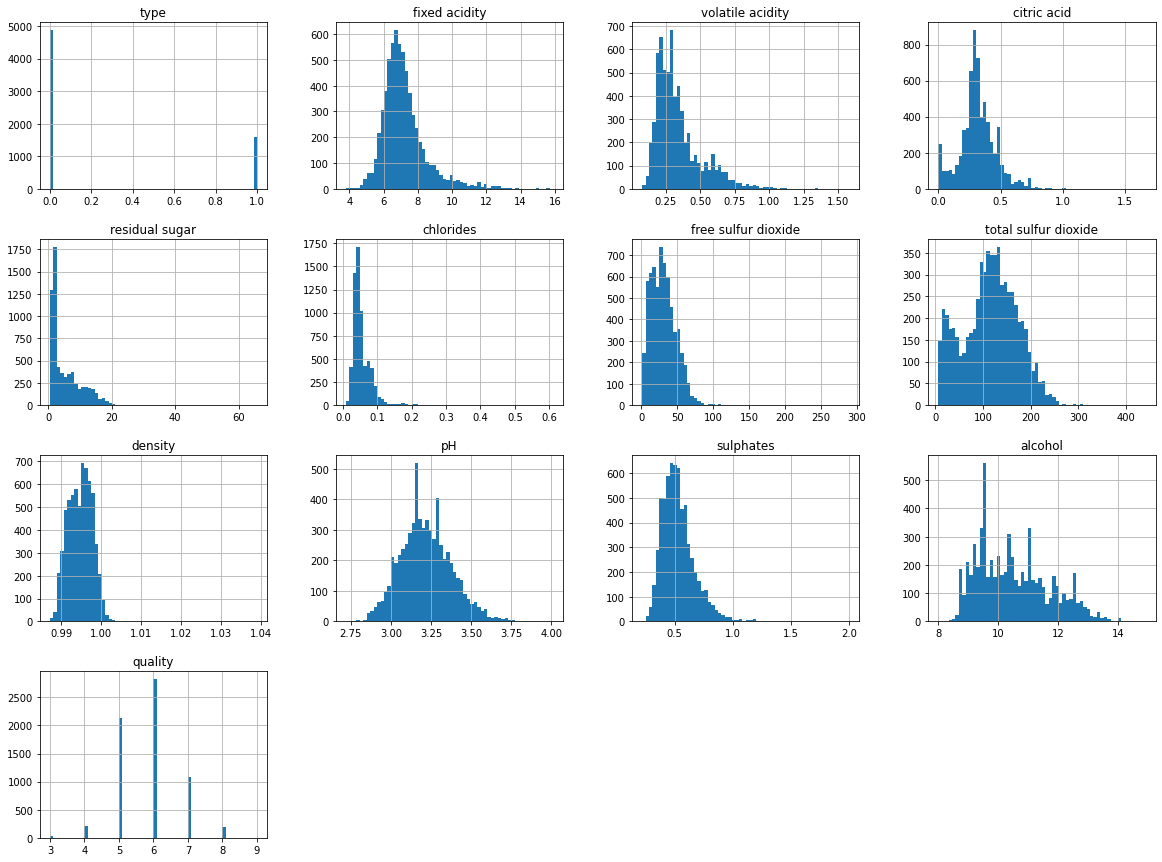

In [5]:
def exploring_dataset(wine):
    print("Data columns")
    print(">"*80)
    print(wine.columns, "\n"*2)
    print("Sum of data values")
    print(">"*80)
    print(wine.describe(), "\n"*2)
    print("Information about data")
    print(">"*80)
    print(wine.info(), "\n"*2)
    print("Shape of data")
    print(">"*80)
    print(wine.shape, "\n"*2)
    print("Distribution of data")
    print(">"*80)
    wine.hist(bins=60, figsize=(20, 15))
exploring_dataset(wine)    

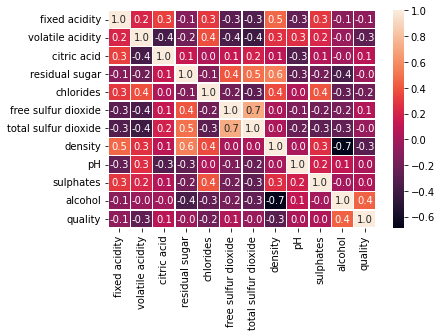

In [11]:
def correlation_matrix(wine):
    corr_wine = wine.drop(columns=["type"]).corr()
    sns.heatmap(corr_wine, annot=True, fmt=".1f", linewidth=.5)
correlation_matrix(wine)

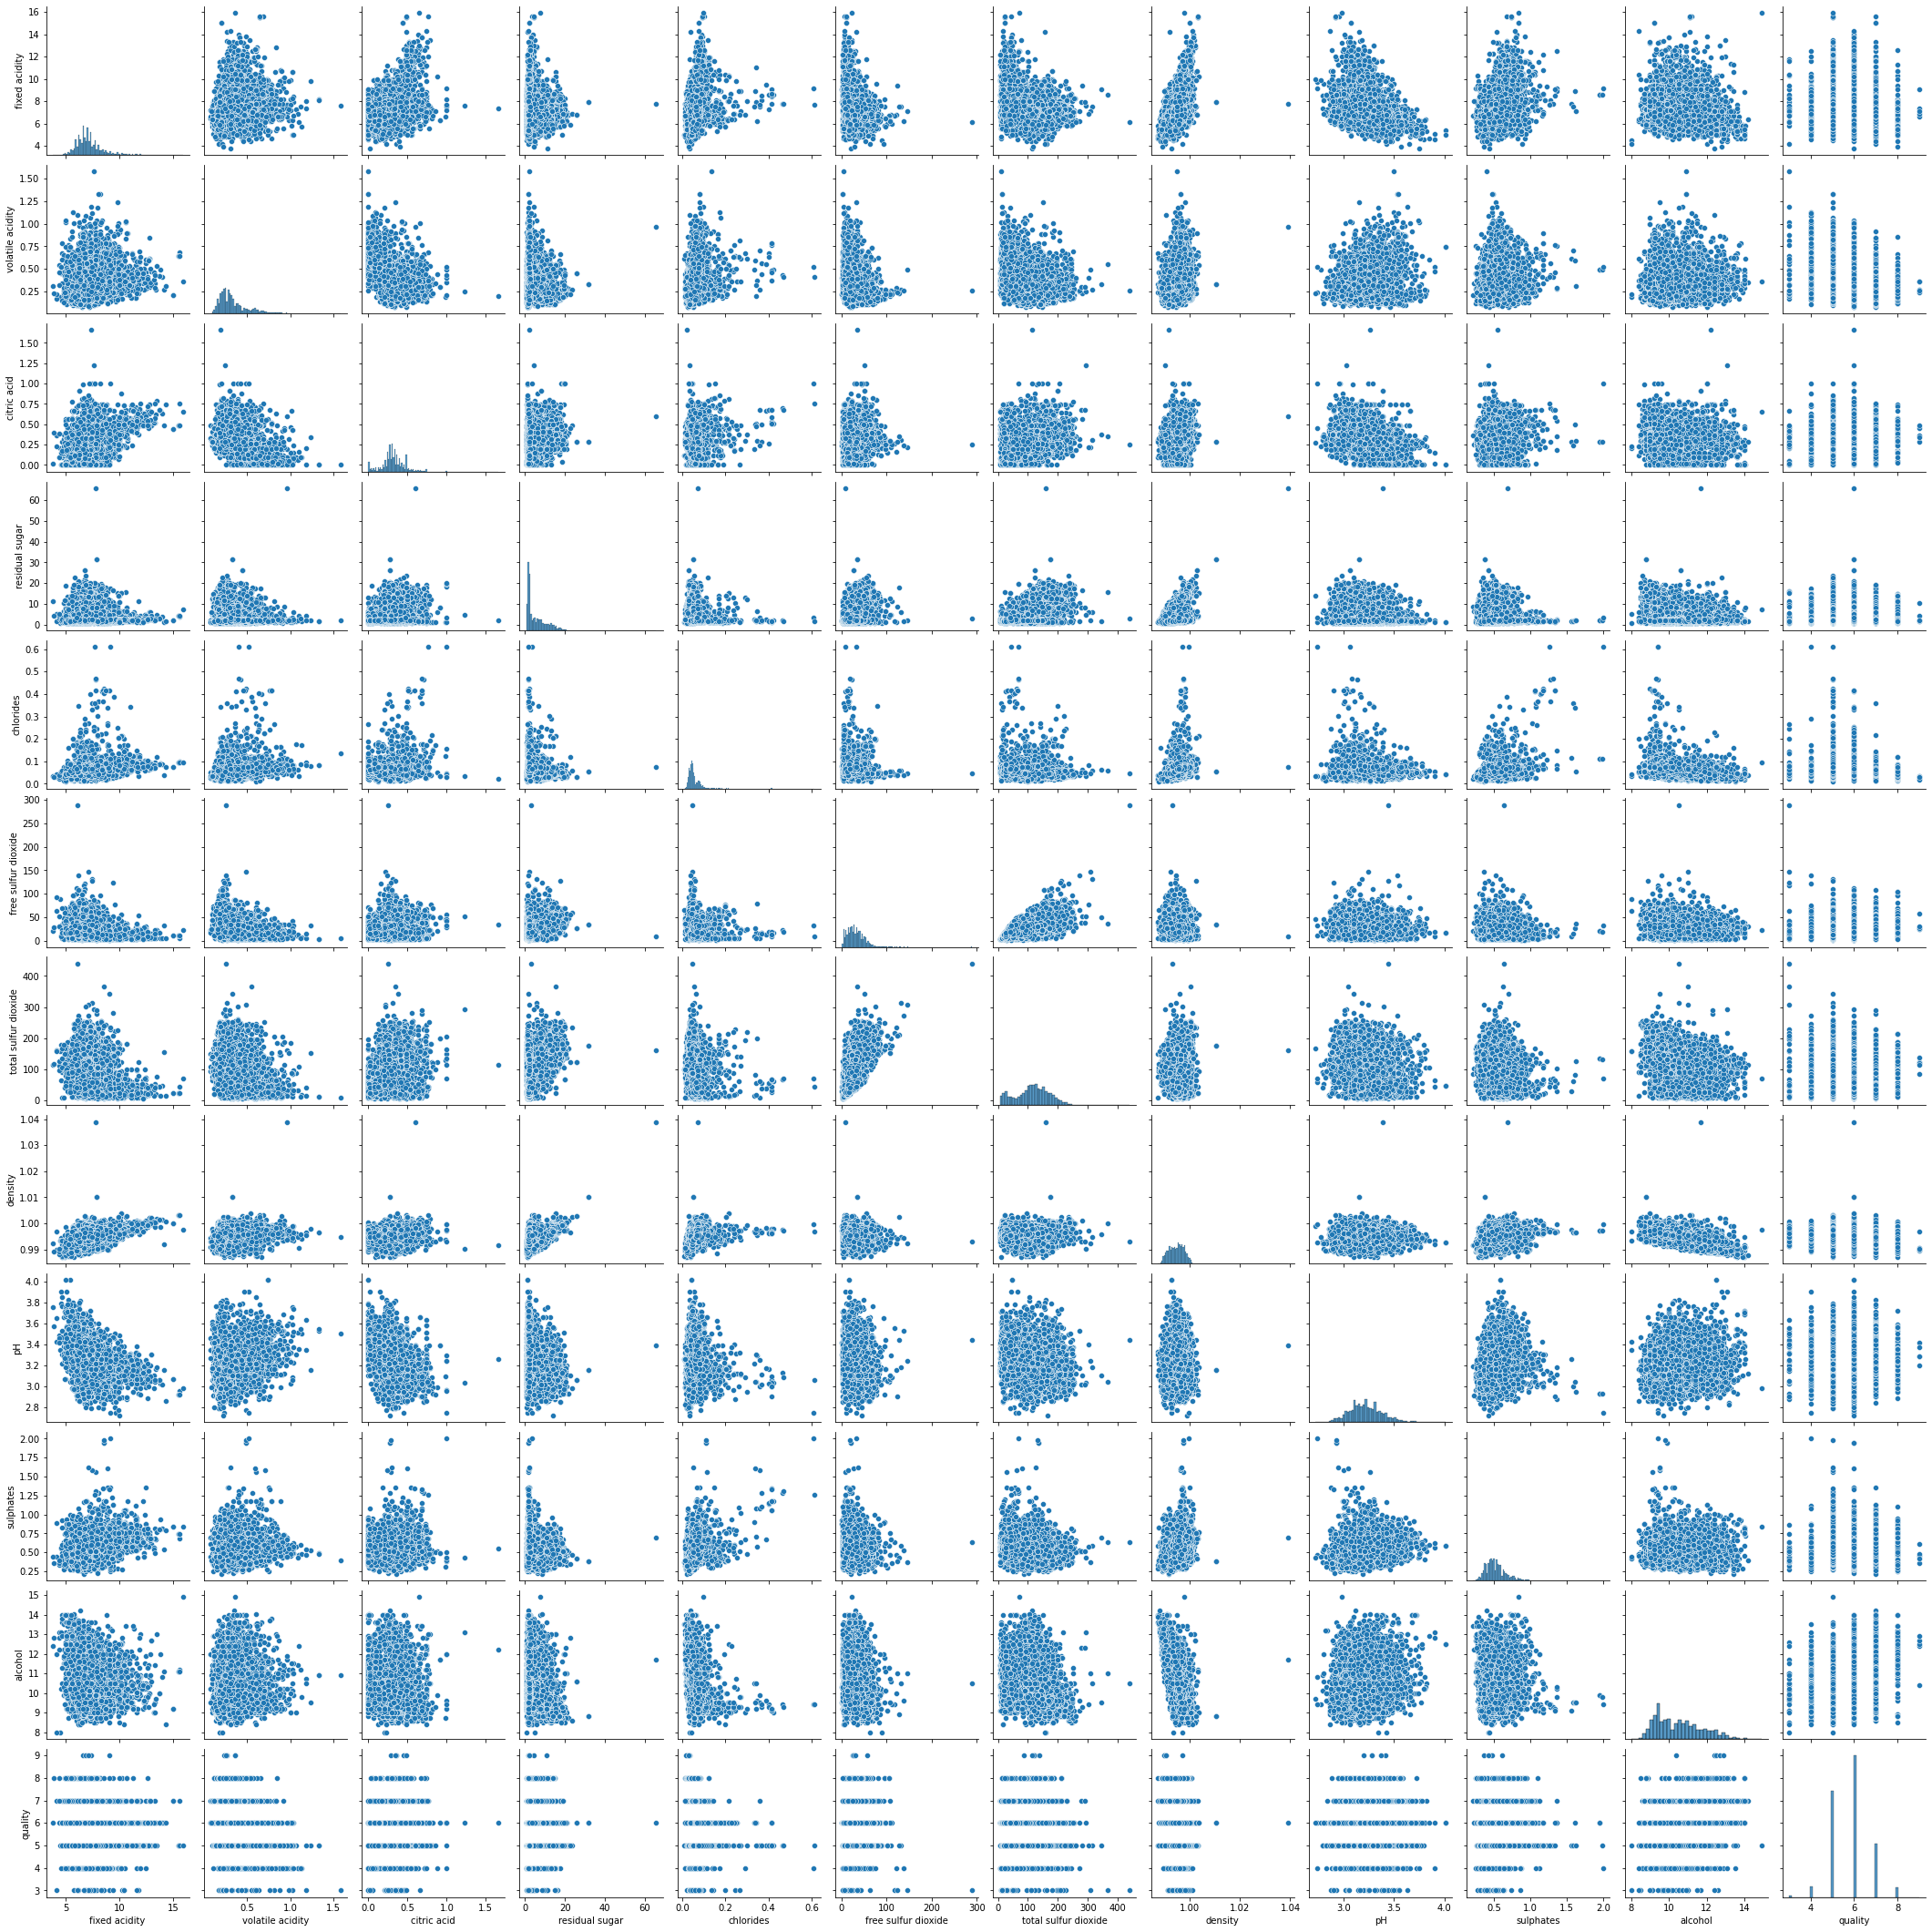

In [7]:
def scatter_matrix(wine):
    sns.pairplot(wine.drop(columns=["type"]))
scatter_matrix(wine)

# Machine Learning

In [8]:
def Random_Forest_Classifier(wine):
    X = wine.iloc[:,1:]
    y = wine.iloc[:,0]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    wine_r2 = r2_score(y_test, y_pred)
    wine_acc = accuracy_score(y_test, y_pred)
    print(f"R2 score: {wine_r2*100}")
    print(f"Accurancy score: {wine_acc*100}")
Random_Forest_Classifier(wine)

R2 score: 97.93227191024172
Accurancy score: 99.61330239752513
